## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_id = duplicate_df["Mouse ID"].unique().tolist()
print(duplicate_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
for id in duplicate_id:
    dup_index = merge_df[merge_df["Mouse ID"] == id].index
dup_df = merge_df.iloc[dup_index,:]
print(dup_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(dup_index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().to_frame().rename(columns={"Tumor Volume (mm3)":"Mean"})
tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame().rename(columns={"Tumor Volume (mm3)":"Median"})
tumor_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame().rename(columns={"Tumor Volume (mm3)":"Variance"})
tumor_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame().rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
tumor_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame().rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_df = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis=1)

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

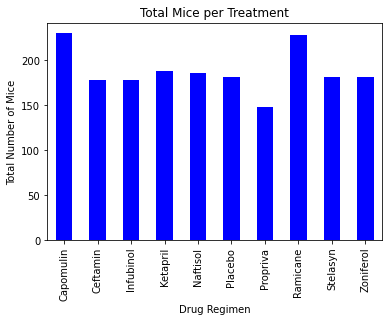

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

mouse_data.plot(kind="bar", facecolor="blue")
plt.title("Total Mice per Treatment")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")


Text(0, 0.5, 'Total Number of Mice')

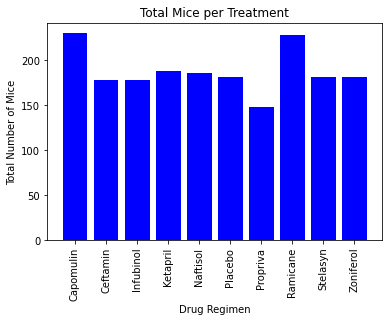

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = mouse_data.to_frame().reset_index()
x_axis = np.arange(len(mouse_data))

plt.bar(x_axis, mouse_data, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs["Drug Regimen"], rotation="vertical")
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")


Text(0.5, 1.0, 'Gender Distribution of Mice')

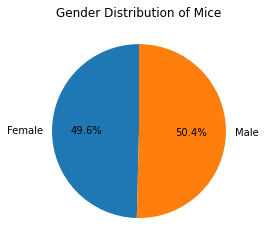

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df.groupby("Sex")["Mouse ID"].nunique()

mouse_gender.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Gender Distribution of Mice")


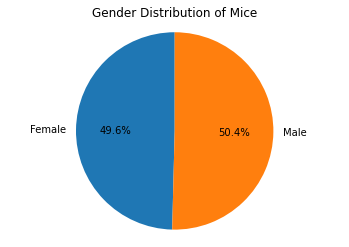

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_gender.to_frame().reset_index()

plt.title("Gender Distribution of Mice")
plt.pie(mouse_gender, labels=genders["Sex"], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_time_df = pd.merge(clean_df, last_time, on="Mouse ID")
last_time_df = last_time_df.loc[last_time_df["Timepoint_x"] == last_time_df["Timepoint_y"]]
last_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# collect rows with drugs listed in treatment list
tumor_df = pd.DataFrame()
tumor_df = last_time_df[last_time_df["Drug Regimen"].isin(treatments)]
tumor_df = tumor_df[["Drug Regimen", "Tumor Volume (mm3)"]]
            
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles.unstack().reset_index()
for treatment in treatments:
    lowerq = quartiles.loc[treatment][0.25]
    upperq = quartiles.loc[treatment][0.75]
    median = quartiles.loc[treatment][0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"---------- Info for {treatment} ----------")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The median is: {median}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(" ")

---------- Info for Capomulin ----------
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
---------- Info for Ramicane ----------
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The median is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
---------- Info for Infubinol ----------
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The median is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 
---------- Info for Ceftamin ----------
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
